# Plot bands
This part imports and plots the band values (divided by class) from the Earth Engine classification.

In [18]:
#Import the necessary libraries
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

Navigate to the folder where the data (in csv format) is contained and import the data.

In [47]:
mypath = './data/class_bands/'
files = [f.split('.')[0] for f in listdir(mypath) if isfile(join(mypath, f))]

dataframe={}
for file in files:
     dataframe[file] = pd.read_csv(mypath+file+'.csv')#provide separator if required

# Print the different classes
print ('The available classes are:')
for key,value in dataframe.items() :
    print (key)

The available classes are:
beach_sand
built_environment
shallow_reef
shallow_sand
vegetation


Plot the Band Value frequency divided by class

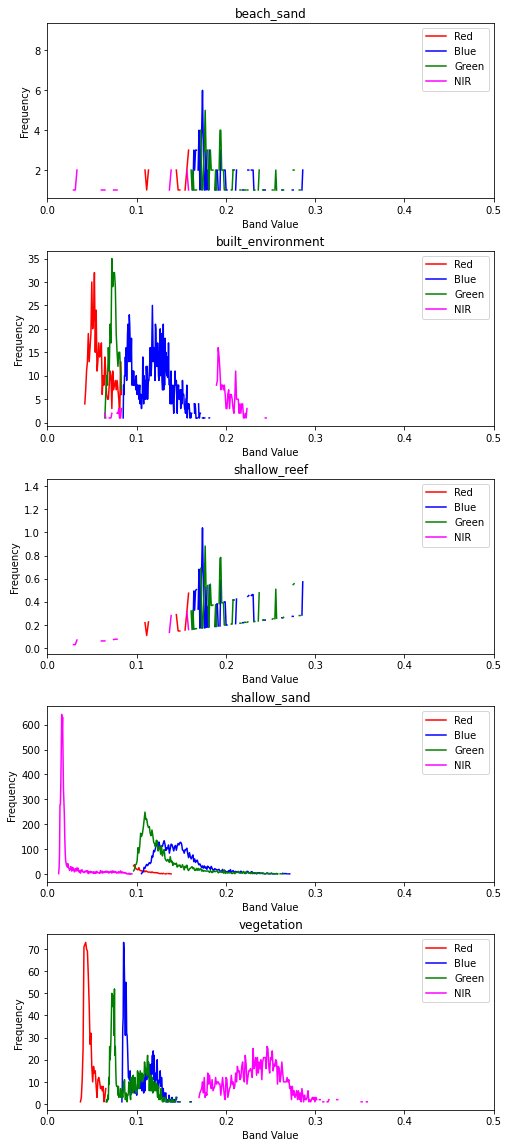

In [71]:
number_of_subplots=len(dataframe)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(hspace=0.30)

for i,v in enumerate(range(number_of_subplots)):
    raster_class=[*dataframe][i]
    v = v+1
    ax1 = subplot(number_of_subplots,1,v)
    ax1.set_title(raster_class)
    ax1.set_xlabel('Band Value')
    ax1.set_ylabel('Frequency')
    ax1.plot(dataframe[raster_class]['Band Value'],dataframe[raster_class]['Red'],color='red',label='Red')
    ax1.plot(dataframe[raster_class]['Band Value'],dataframe[raster_class]['Blue'],color='blue',label='Blue')
    ax1.plot(dataframe[raster_class]['Band Value'],dataframe[raster_class]['Green'],color='green',label='Green')
    ax1.plot(dataframe[raster_class]['Band Value'],dataframe[raster_class]['NIR'],color='magenta',label='NIR')
    ax1.legend()
    plt.xlim(0,0.5) #change this to adjust max band value

plt.show()

# Plot classes
This part imports the classfied image, calculate the area for each band and plots it

In [23]:
#Import the necessary libraries
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np

Import the image and mask the '0' value, that corresponds to 'NoData'

In [65]:
path = r'.\data\raster\EE_mindist_10m.tif'
img = rasterio.open(path)
image = img.read()
image_masked = np.ma.masked_array(image, mask=(image == 0))

Calculate the histogram values for each class and create a histogram.

In [83]:
histogram, bin_edges = np.histogram(image_masked, bins=6)
# Change classes as needed
df = pd.DataFrame(data=histogram, index=['NoData',
                                         'Vegetation',
                                         'Shallow water sand/reef complex',
                                         'Beach sands',
                                         'Shallow-water reef',
                                         'Built environment'],columns=['Pixel count'])
df['Area (sq Km)'] = df['Pixel count']*400/1000000 #the image pixel size is 20x20m, so each pixel is 400 smq. Change as necessary with an image of different resolution
df=df.drop(index=['NoData'])
df

,Pixel count,Area (sq Km)
Vegetation,40179,16.0716
Shallow water sand/reef complex,167099,66.8396
Beach sands,4773,1.9092
Shallow-water reef,847634,339.0536
Built environment,31976,12.7904


Plot histograms for the onland and shallow-water part of the image.

<AxesSubplot:title={'center':'Shallow water coverage'}>

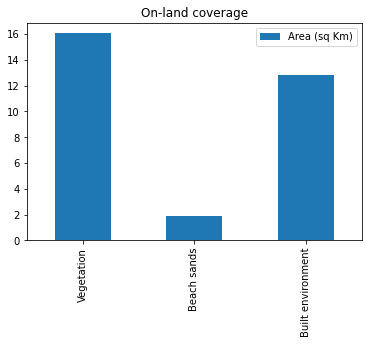

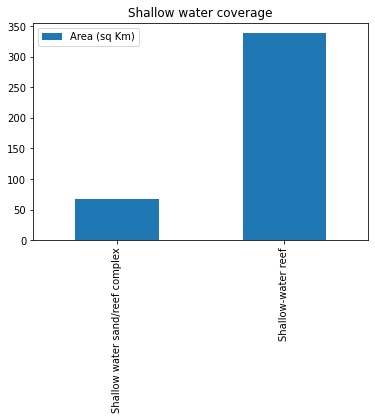

In [84]:
onland=df.drop(index=['Shallow water sand/reef complex',
                      'Shallow-water reef'])

sea=df.drop(index=['Vegetation',
                   'Beach sands',
                   'Built environment'])

onland.plot.bar(y='Area (sq Km)',title='On-land coverage')
sea.plot.bar(y='Area (sq Km)',title='Shallow water coverage')


# Code acknowledgments
**Import multiple csv files**: https://stackoverflow.com/questions/54434899/how-to-read-multiple-csv-files-from-folder-into-pandas-with-dataframe-name-as-fi

**Iterative plot**: https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib